# Loading the Dataset

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/marketing_campaign.csv'
df = pd.read_csv(dataset_path, sep='\t', engine='python')

df

Mounted at /content/drive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Preprocessing/Cleaning
<p align = 'justify'>
In this section we will check for **missing** values, convert dates to **DataTime** objects, and transform dtype: objects to **numerical** values if possible.
</p>

<p align = 'justify'>
Below we will examine which **rows** have missing values to better understand the dataframe. Moreover, we will find which are the **columns** that have missing values
</p>

In [ ]:
pd.options.mode.use_inf_as_na = True

missing_rows = df[df.isna().any(axis=1)]
missing_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
missing_cols = df.columns[df.isna().any()]
missing_cols

Index(['Income'], dtype='object')

We can see that all the missing values are in column '**Income**'.

Now we will **drop** all the rows with missing values

In [ ]:
print(f"{len(missing_rows)} rows with missing values will be droped")
df = df.dropna(how='any')
df

24 rows with missing values will be droped


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


<p align = 'justify'>
The only columns with dates is the column '**Dt_Customer**' and the column '**Recency**' which implies a date. We will both convert them to DateTime objects. For Recency we will use the currect time as the last date.
</p>

In [ ]:
from datetime import datetime
from datetime import timedelta

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

current_date = datetime.today().date()
df['Recency'] = df['Recency'].apply(lambda x: (current_date - timedelta(days=x)))
df['Recency'] = pd.to_datetime(df['Recency'], format='%Y-%m-%d')

df


<ipython-input-5-92e0417122c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
<ipython-input-5-92e0417122c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recency'] = df['Recency'].apply(lambda x: (current_date - timedelta(days=x)))
<ipython-input-5-92e0417122c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2023-02-20,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2023-03-12,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2023-03-24,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2023-03-24,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2023-01-15,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,2023-03-04,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,2023-02-22,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,2023-01-18,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,2023-04-11,428,...,3,0,0,0,0,0,0,3,11,0


Now we will see which columns are dtype: objects and check the different values they take.

In [ ]:
for col in df.select_dtypes(include='object'):
  print(f"{col} different values: {df[col].unique()}")

Education different values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status different values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


We will change the values **'Alone' 'Absurd' 'YOLO'** to **'Single'**

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df

<ipython-input-7-ba0145c69e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2023-02-20,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2023-03-12,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2023-03-24,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2023-03-24,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2023-01-15,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,2023-03-04,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,2023-02-22,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,2023-01-18,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,2023-04-11,428,...,3,0,0,0,0,0,0,3,11,0


We will check the **frequency** of each value in 'Education' and 'Marital_Status'

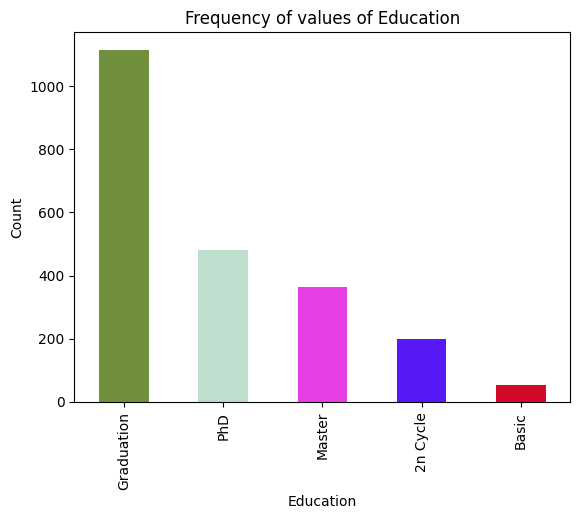

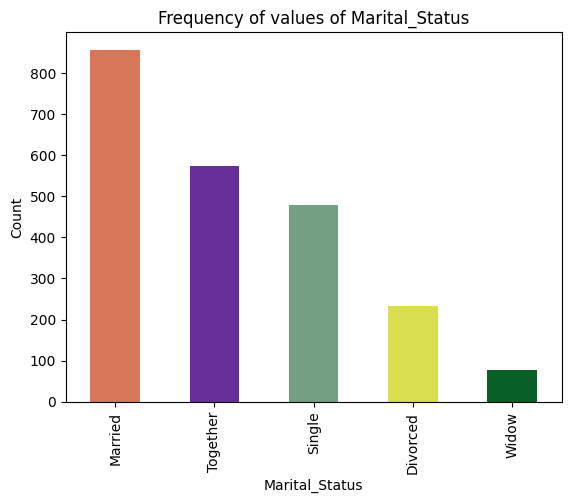

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_col_value_freq(col):
  counts = df[col].value_counts()
  cmap = plt.cm.colors.ListedColormap(np.random.rand(len(counts), 3))
  colors = [cmap(i) for i in np.linspace(0, 1, len(counts))]
  counts.plot(kind='bar', color=colors)
  plt.title(f'Frequency of values of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

plot_col_value_freq('Education')
plot_col_value_freq('Marital_Status')

Now we will transform 'Marital_Status' to numerical values:

*   Married -> 1
*   Together -> 2
*   Single -> 3
*   Divorced -> 4
*   Widow -> 5

And transform 'Education' to numerical values:

*   Graduation -> 1
*   PhD -> 2
*   Master -> 3
*   2n Cycle -> 4
*   Basic -> 5





In [ ]:
marital_mapping = {
    'Married': 1,
    'Together': 2,
    'Single': 3,
    'Divorced': 4,
    'Widow': 5
}
df['Marital_Status'] = df['Marital_Status'].replace(marital_mapping)

education_mapping = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    '2n Cycle': 4,
    'Basic': 5
}
df['Education'] = df['Education'].replace(education_mapping)
df


<ipython-input-9-7e7902384e32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(marital_mapping)
<ipython-input-9-7e7902384e32>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace(education_mapping)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,3,0,0,0,0,0,0,3,11,0


# Creating new Features

<p align = 'justify'>
We will create a new column '**Customer_For**' which will give us the number of days someone was a customer, which is the **time between** the day of 
'**Recency**' and the day of '**Dt_Customer**'. For the customers where the date of Recency is before Dt_Customer we will drop the row.
</p>

In [ ]:
df['Customer_For'] = (df['Recency'] - df['Dt_Customer']).dt.days
df.loc[df['Customer_For'] < 0, 'Customer_For'] = pd.NA
df.dropna(subset=['Customer_For'], inplace=True)
df

<ipython-input-10-54a66acfcd7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_For'] = (df['Recency'] - df['Dt_Customer']).dt.days
<ipython-input-10-54a66acfcd7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Customer_For'], inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,0,0,0,0,0,3,11,1,3821.0
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,0,0,0,0,0,3,11,0,3291.0
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,0,0,0,0,0,3,11,0,3502.0
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,0,0,0,0,0,3,11,0,3329.0
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,0,0,0,0,0,3,11,0,3283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,0,0,0,0,0,3,11,0,3551.0
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,0,0,0,1,0,0,3,11,0,3179.0
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,0,1,0,0,0,0,3,11,0,3280.0
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,0,0,0,0,0,3,11,0,3364.0


We create a new column '**Age**' which gives us how many years old is the customer

In [ ]:
df['Age'] = pd.Timestamp('now').year - df['Year_Birth']
df

<ipython-input-11-fbff95f9e254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.Timestamp('now').year - df['Year_Birth']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,0,0,0,0,3,11,1,3821.0,66
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,0,0,0,0,3,11,0,3291.0,69
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,0,0,0,0,3,11,0,3502.0,58
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,0,0,0,0,3,11,0,3329.0,39
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,0,0,0,0,3,11,0,3283.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,0,0,0,0,3,11,0,3551.0,56
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,0,0,1,0,0,3,11,0,3179.0,77
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,1,0,0,0,0,3,11,0,3280.0,42
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,0,0,0,0,3,11,0,3364.0,67


We create new column '**Spent**' which is the total sum of money spent in the last 2 years for each customer.

In [ ]:
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df

<ipython-input-12-3908f331daba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,0,0,0,3,11,1,3821.0,66,1617
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,0,0,0,3,11,0,3291.0,69,27
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,0,0,0,3,11,0,3502.0,58,776
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,0,0,0,3,11,0,3329.0,39,53
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,0,0,0,3,11,0,3283.0,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,0,0,0,3,11,0,3551.0,56,1341
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,0,1,0,0,3,11,0,3179.0,77,444
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,0,0,0,0,3,11,0,3280.0,42,1241
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,0,0,0,3,11,0,3364.0,67,843


We will find the total number of children in each home and assign it to a new column '**Children**'

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df

<ipython-input-13-f8a5c4b1b36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children'] = df['Kidhome'] + df['Teenhome']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,0,0,3,11,1,3821.0,66,1617,0
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,0,0,3,11,0,3291.0,69,27,2
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,0,0,3,11,0,3502.0,58,776,0
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,0,0,3,11,0,3329.0,39,53,1
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,0,0,3,11,0,3283.0,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,0,0,3,11,0,3551.0,56,1341,1
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,1,0,0,3,11,0,3179.0,77,444,3
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,0,0,0,3,11,0,3280.0,42,1241,0
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,0,0,3,11,0,3364.0,67,843,1


<p align = 'justify'>
We will find the '**Family_Size**' by adding the 'Children' and how many parents are there. If the customer is Married or Together (the value should be 1 or 2 after we changed them): the we add 2, otherwise 1.
</p>

In [ ]:
df['Family_Size'] = df['Children'] + 1
df.loc[df['Marital_Status'] <= 2, 'Family_Size'] += 1
df

<ipython-input-14-c2f344565ea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_Size'] = df['Children'] + 1


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,0,3,11,1,3821.0,66,1617,0,1
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,0,3,11,0,3291.0,69,27,2,3
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,0,3,11,0,3502.0,58,776,0,2
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,0,3,11,0,3329.0,39,53,1,3
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,0,3,11,0,3283.0,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,0,3,11,0,3551.0,56,1341,1,3
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,0,0,3,11,0,3179.0,77,444,3,5
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,0,0,3,11,0,3280.0,42,1241,0,1
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,0,3,11,0,3364.0,67,843,1,3


We will create a new column '**Is_Parent**' which is 1 if the customer has 'Children' > 0. Otherwise the value will be 0

In [ ]:
df['Is_Parent'] = (df['Children'] > 0).astype(int)
df

<ipython-input-15-e569164eb61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Parent'] = (df['Children'] > 0).astype(int)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,0,3,11,1,3821.0,66,1617,0,1,0
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,0,3,11,0,3291.0,69,27,2,3,1
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,0,3,11,0,3502.0,58,776,0,2,0
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,0,3,11,0,3329.0,39,53,1,3,1
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,0,3,11,0,3283.0,42,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,0,3,11,0,3551.0,56,1341,1,3,1
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,0,3,11,0,3179.0,77,444,3,5,1
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,0,3,11,0,3280.0,42,1241,0,1,0
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,0,3,11,0,3364.0,67,843,1,3,1


Now we create new column '**Living_With**' which has values '**Partner**' and '**Alone**' based on 'Marital_Status'

In [ ]:
df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if x <= 2 else 'Alone')
df

<ipython-input-16-9c6adfba26f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if x <= 2 else 'Alone')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,3,11,1,3821.0,66,1617,0,1,0,Alone
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,3,11,0,3291.0,69,27,2,3,1,Alone
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,3,11,0,3502.0,58,776,0,2,0,Partner
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,3,11,0,3329.0,39,53,1,3,1,Partner
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,3,11,0,3283.0,42,422,1,3,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,3,11,0,3551.0,56,1341,1,3,1,Partner
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,3,11,0,3179.0,77,444,3,5,1,Partner
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,3,11,0,3280.0,42,1241,0,1,0,Alone
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,3,11,0,3364.0,67,843,1,3,1,Partner


We create new column '**Age_Group**' based on '**Age**' value

In [ ]:
def age_to_group(age):
  if age >= 21 and age <= 30:
    return 1
  elif age >= 31 and age <= 40:
    return 2
  elif age >= 41 and age <= 50:
    return 3
  elif age >= 51 and age <= 60:
    return 4
  elif age >= 61 and age <= 70:
    return 5
  elif age >= 71 and age <= 80:
    return 6
  else:
      return 7

df['Age_Group'] = df['Age'].apply(age_to_group)
df


<ipython-input-17-3228802b4072>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(age_to_group)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,11,1,3821.0,66,1617,0,1,0,Alone,5
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,11,0,3291.0,69,27,2,3,1,Alone,5
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,11,0,3502.0,58,776,0,2,0,Partner,4
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,11,0,3329.0,39,53,1,3,1,Partner,2
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,11,0,3283.0,42,422,1,3,1,Partner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,11,0,3551.0,56,1341,1,3,1,Partner,4
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,11,0,3179.0,77,444,3,5,1,Partner,6
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,11,0,3280.0,42,1241,0,1,0,Alone,3
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,11,0,3364.0,67,843,1,3,1,Partner,5


# Removing extreme values

Now we will check for **extreme values** and drop such rows.

We examine the data by plotting some histograms and we conclude that for the majority of the customers the following holds:

1. Year_Birth is in range 1940 - 2000
2. Income is in range 0 - 100000
3. Children is at most 3
4. MntWines at most 1400
5. MntFruits at most 200
6. MntMeatProducts at most 1000
7. MntFishProducts at most 250
8. MntSweetProducts at most 200
9. MntGoldProducts at most 250
10. NumDealPurchases at most 14
11. NumWebPurchases at most 13
12. NumCatalogPurchases at most 12
13. NumStorePurchases at most 13
14. NumWebVisitsMonth at most 10
15. Customer_For is between 3100 and 3900
16. Age is between 21 and 80
17. Spent is less than 2500
18. Family_Size at most 5


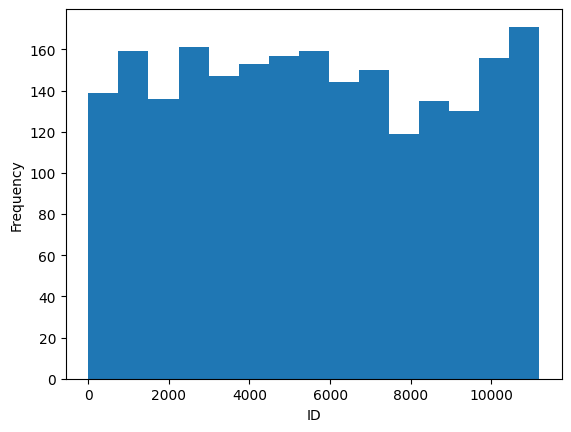

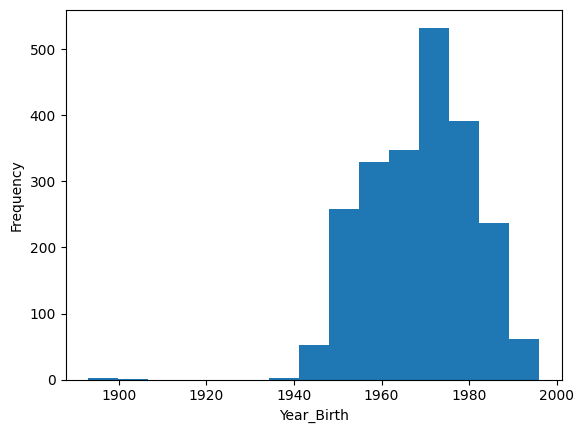

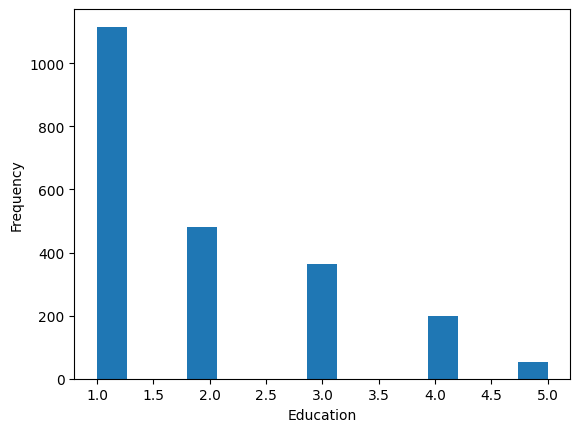

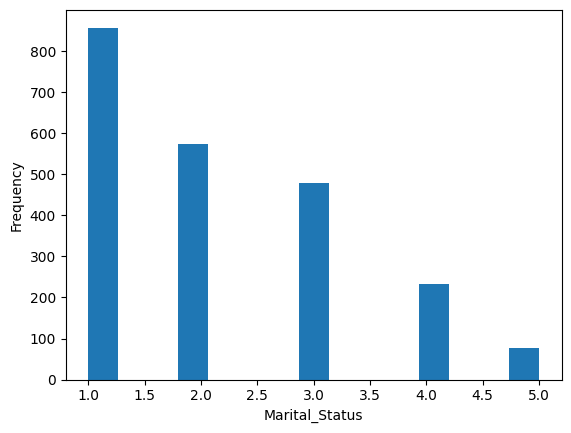

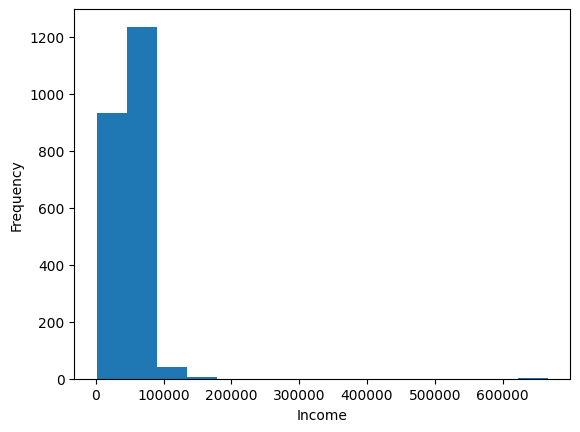

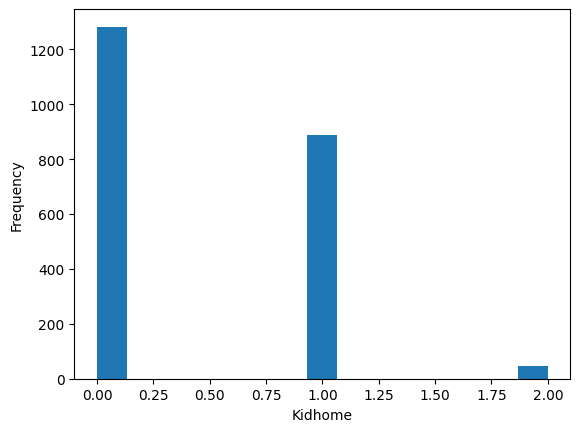

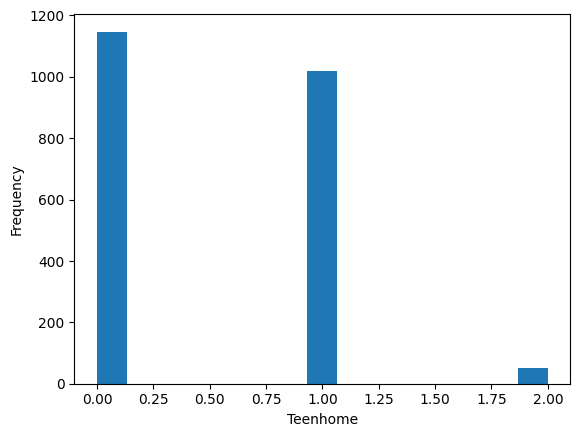

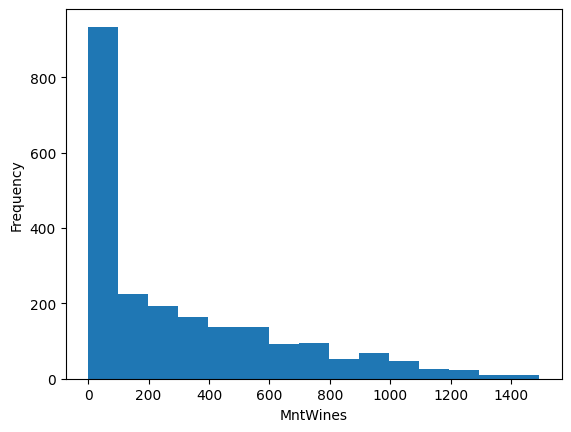

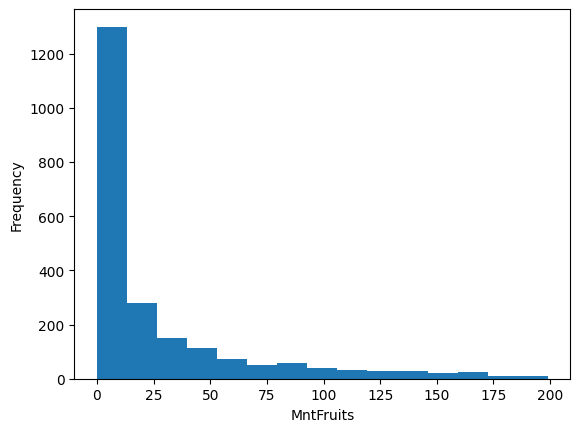

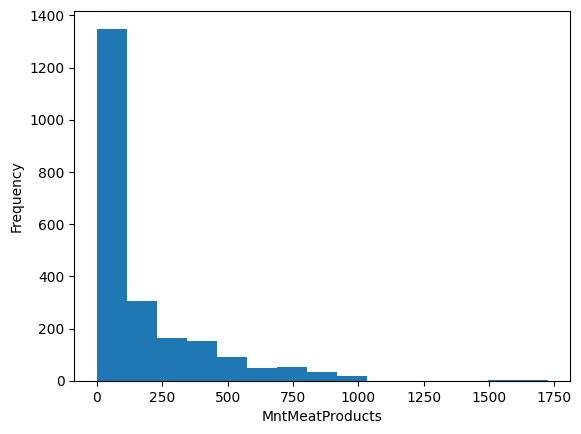

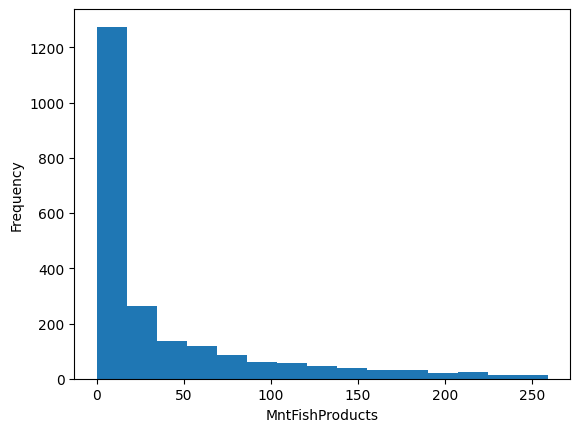

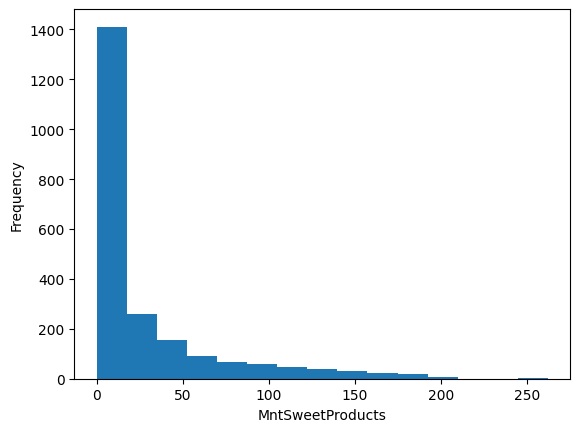

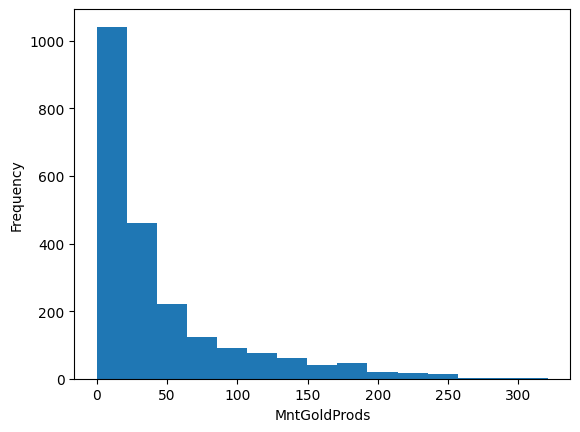

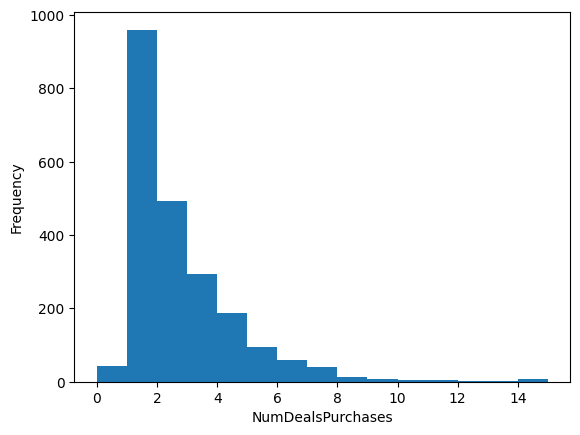

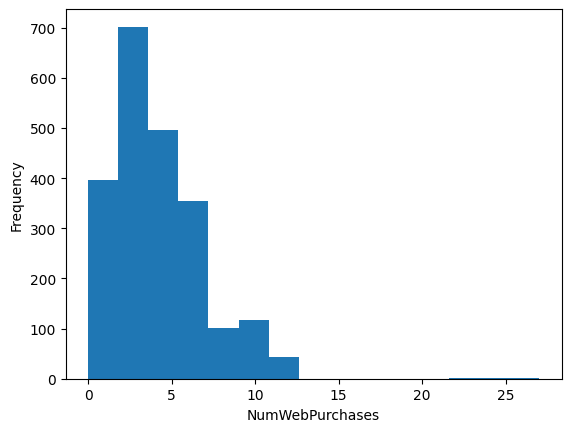

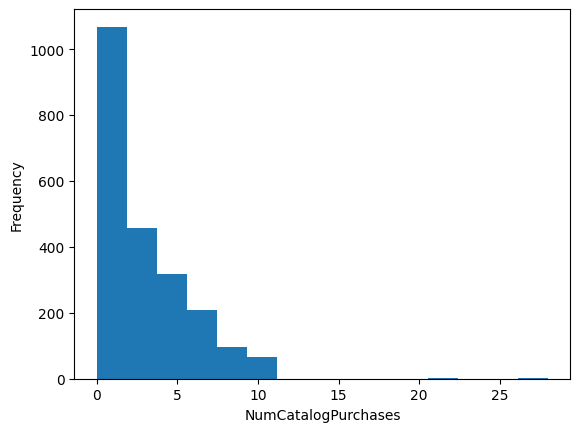

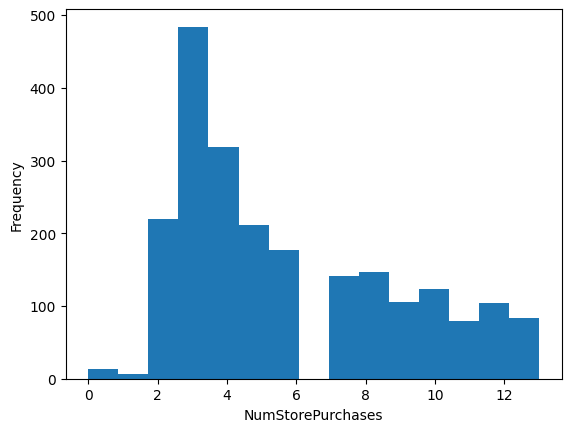

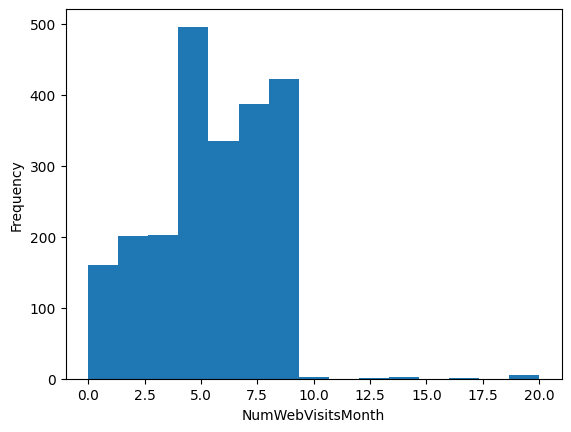

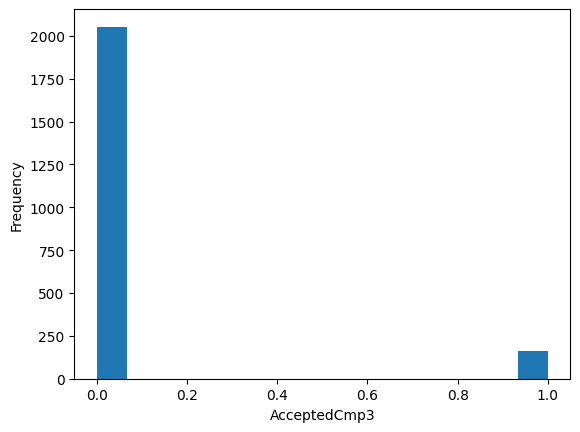

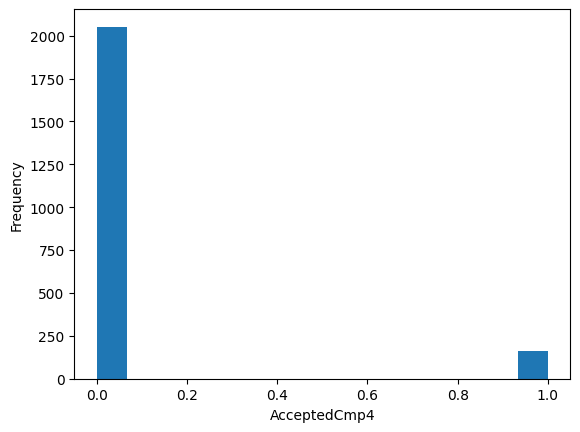

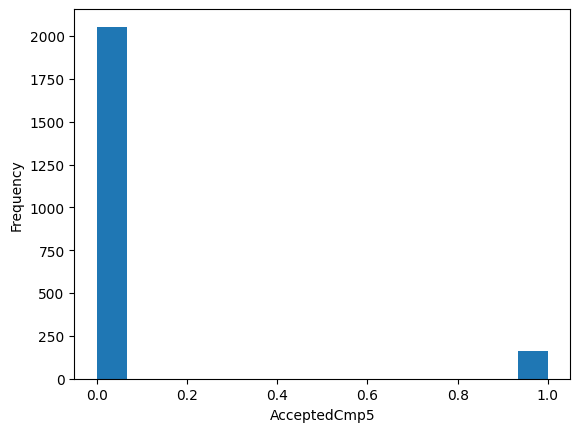

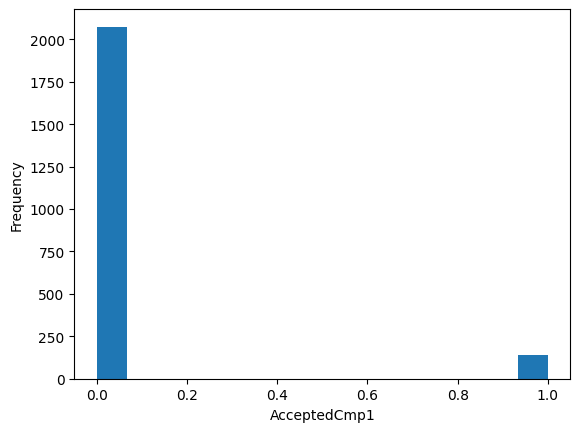

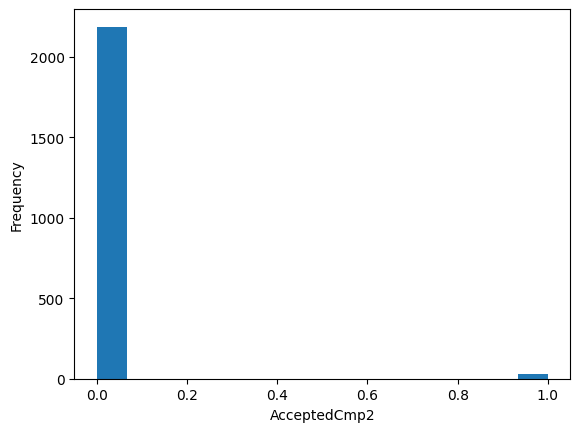

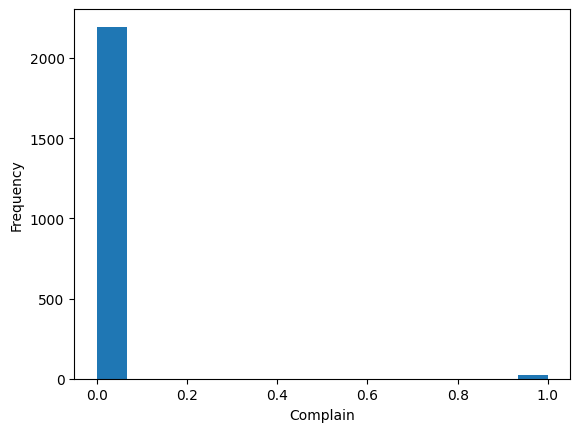

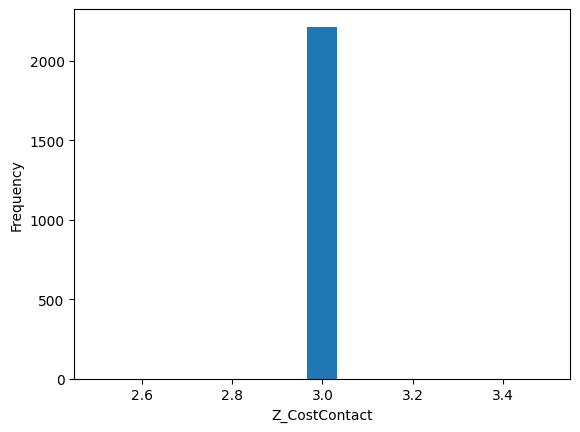

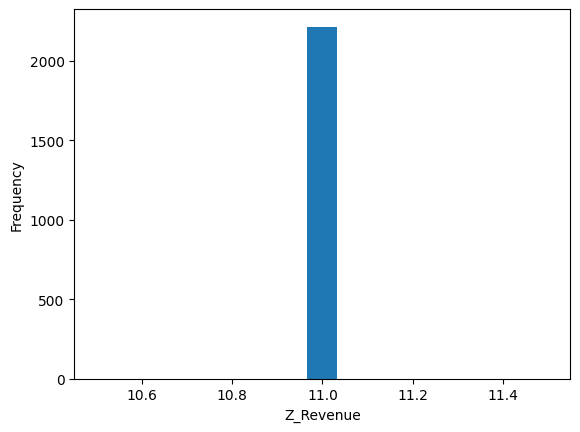

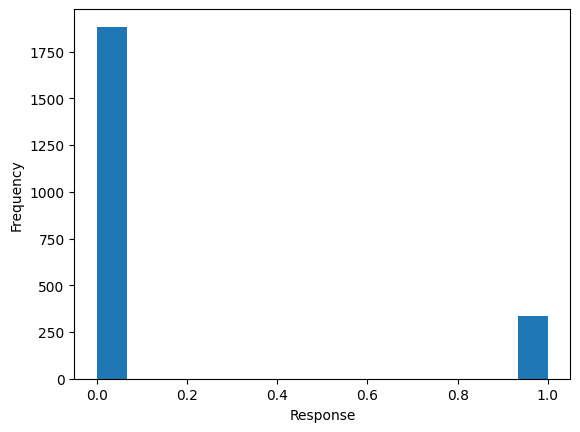

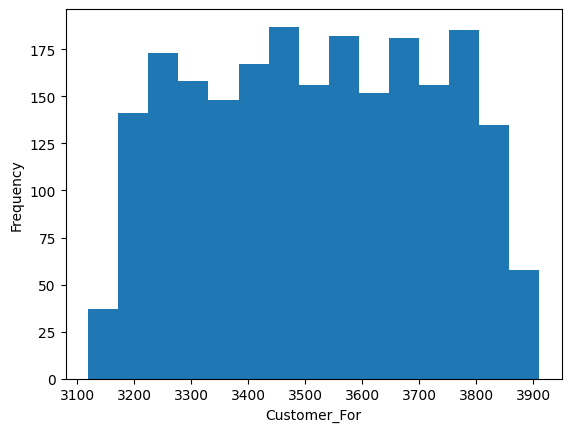

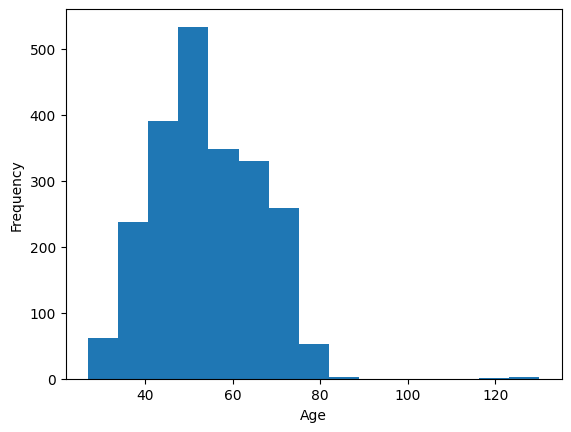

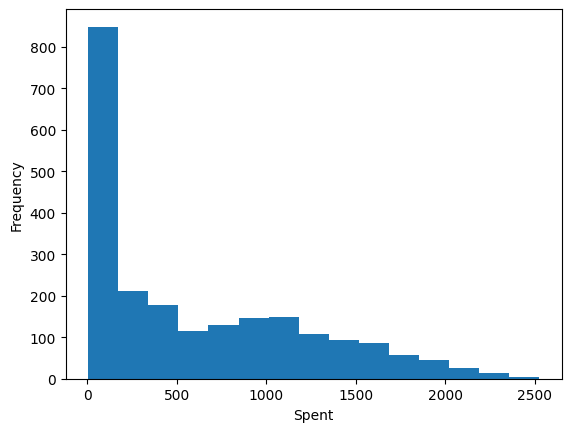

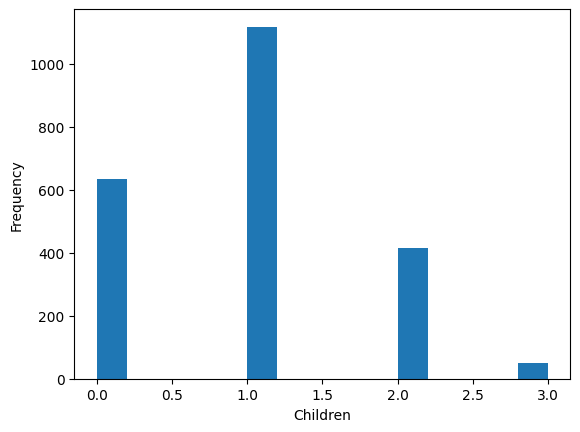

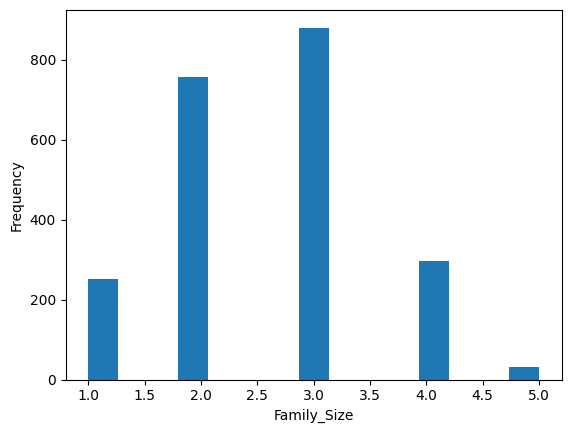

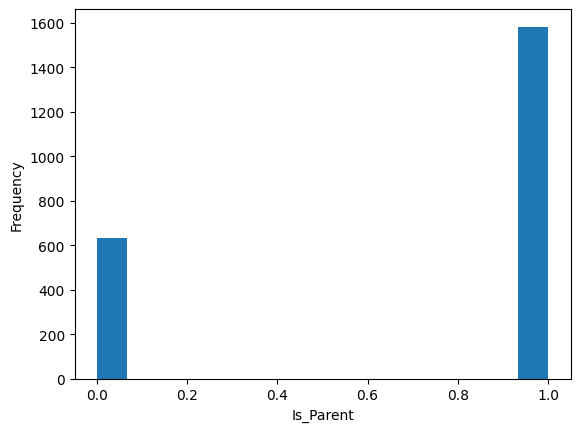

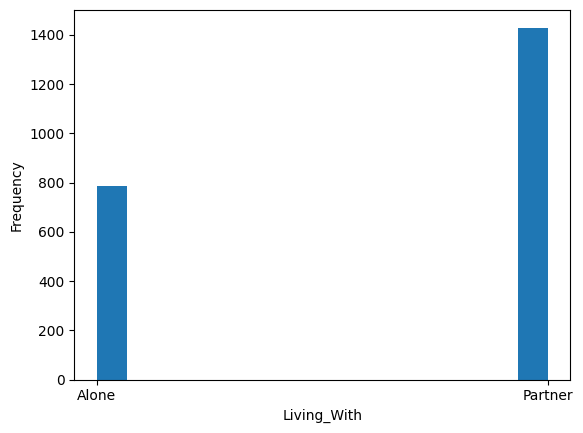

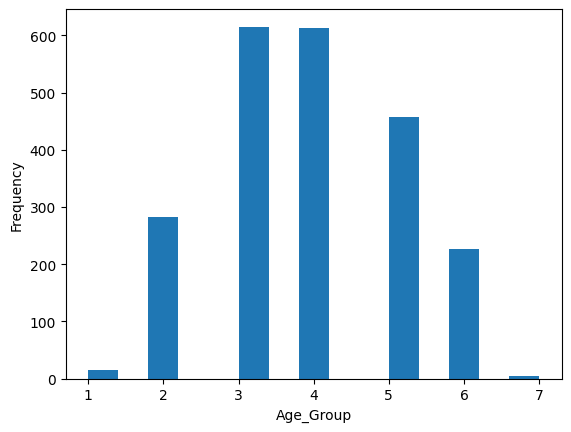

In [ ]:
def plot_distribution(col):
  plt.hist(df[col], bins=15)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

for col in df.columns:
  if df[col].dtype != 'datetime64[ns]':
    plot_distribution(col)

Now we will drop all the rows that do not follow the above

In [ ]:
mask1 = df['Year_Birth'].between(1940, 2000)
mask2 = df['Income'].between(0, 100000)
mask3 = df['Children'] <= 3
mask4 = df['MntWines'] <= 1400
mask5 = df['MntFruits'] <= 200
mask6 = df['MntMeatProducts'] <= 1000
mask7 = df['MntFishProducts'] <= 250
mask8 = df['MntSweetProducts'] <= 200
mask9 = df['MntGoldProds'] <= 250
mask10 = df['NumDealsPurchases'] <= 14
mask11 = df['NumWebPurchases'] <= 13
mask12 = df['NumCatalogPurchases'] <= 12
mask13 = df['NumStorePurchases'] <= 13
mask14 = df['NumWebVisitsMonth'] <= 10
mask15 = df['Customer_For'].between(3100, 3900)
mask16 = df['Age'].between(21, 80)
mask17 = df['Spent'] < 2500
mask18 = df['Family_Size'] <= 5

mask = mask1 & mask2 & mask3 & mask4 & mask5 & mask6 & mask7 & mask8 & mask9 & mask10 & mask11 & mask12 & mask13 & mask14 & mask15 & mask16 & mask17 & mask18
df = df.loc[mask].dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,11,1,3821.0,66,1617,0,1,0,Alone,5
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,11,0,3291.0,69,27,2,3,1,Alone,5
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,11,0,3502.0,58,776,0,2,0,Partner,4
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,11,0,3329.0,39,53,1,3,1,Partner,2
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,11,0,3283.0,42,422,1,3,1,Partner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,11,0,3551.0,56,1341,1,3,1,Partner,4
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,11,0,3179.0,77,444,3,5,1,Partner,6
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,11,0,3280.0,42,1241,0,1,0,Alone,3
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,11,0,3364.0,67,843,1,3,1,Partner,5


Now we will check and remove if some rows have Year_Birth is after Dt_Customer

In [ ]:
rows_to_drop = df[pd.to_datetime(df['Year_Birth'], format='%Y') > df['Dt_Customer']].index
df.drop(rows_to_drop, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,1,3,58138.0,0,0,2012-09-04,2023-02-20,635,...,11,1,3821.0,66,1617,0,1,0,Alone,5
1,2174,1954,1,3,46344.0,1,1,2014-03-08,2023-03-12,11,...,11,0,3291.0,69,27,2,3,1,Alone,5
2,4141,1965,1,2,71613.0,0,0,2013-08-21,2023-03-24,426,...,11,0,3502.0,58,776,0,2,0,Partner,4
3,6182,1984,1,2,26646.0,1,0,2014-02-10,2023-03-24,11,...,11,0,3329.0,39,53,1,3,1,Partner,2
4,5324,1981,2,1,58293.0,1,0,2014-01-19,2023-01-15,173,...,11,0,3283.0,42,422,1,3,1,Partner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,2023-03-04,709,...,11,0,3551.0,56,1341,1,3,1,Partner,4
2236,4001,1946,2,2,64014.0,2,1,2014-06-10,2023-02-22,406,...,11,0,3179.0,77,444,3,5,1,Partner,6
2237,7270,1981,1,4,56981.0,0,0,2014-01-25,2023-01-18,908,...,11,0,3280.0,42,1241,0,1,0,Alone,3
2238,8235,1956,3,2,69245.0,0,1,2014-01-24,2023-04-11,428,...,11,0,3364.0,67,843,1,3,1,Partner,5


# Examining correlation

Now we will examine the **correlation** between the features using a heatmap.

A correlation value of **+1** indicates that when one variable **increases**, the other variable also **increases proportionally**.

A correlation value of **-1** indicates that when one variable **increases**, the other variable **decreases** **proportionally**.

A correlation value of **0** indicates that the two variables are **independent** of each other.

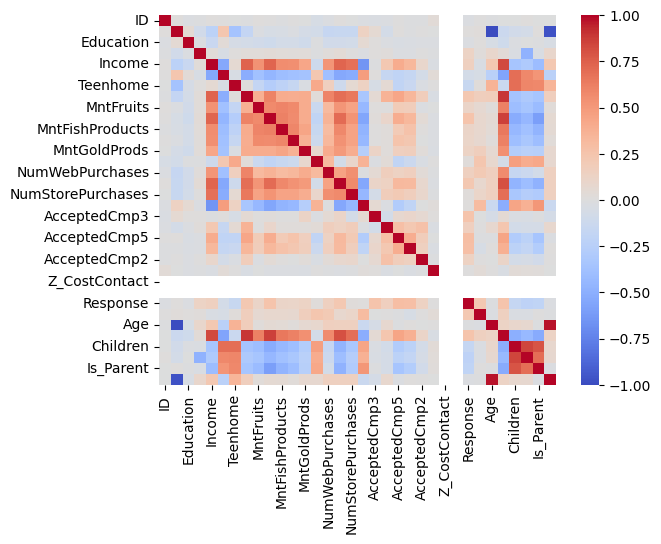

In [ ]:
import seaborn as sns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

We will **mask** out some correlations if the are **not strongly correlated** in order to examine the heatmap easier.

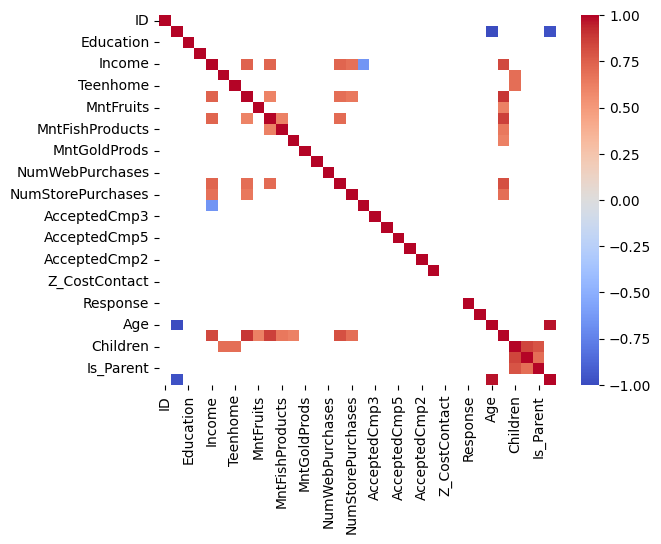

In [ ]:
import seaborn as sns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_cols.corr()
threshold = 0.6
mask = np.abs(corr_matrix) < threshold
sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask)
plt.show()

In [ ]:
correlated_pairs = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i, j]) >= 0.6:
            correlated_pairs.append([corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]])

corr_df = pd.DataFrame(correlated_pairs, columns=['feature_1', 'feature_2', 'correlation'])
corr_df

,feature_1,feature_2,correlation
0,Year_Birth,Age,-1.000000
1,Year_Birth,Age_Group,-0.971448
2,Income,MntWines,0.734869
3,Income,MntMeatProducts,0.726714
4,Income,NumCatalogPurchases,0.732929
5,Income,NumStorePurchases,0.684783
6,Income,NumWebVisitsMonth,-0.654004
7,Income,Spent,0.832060
8,Kidhome,Children,0.689122
9,Teenhome,Children,0.695056


Now we will answer the following 10 questions from the 18 provided, using plots:

1. To which category of Marital_Status belongs the largest percentage of the company's customers?
2. How many customers have made a Complain?
5. Relationship between Age Group and feature Spent.
7. Relationship between Education and Income
8. Relationship between Family_Size and Income
9. Relationship between Income and Children
14. Draw the histogram for the NumDealsPurchases column.
15. Draw the histogram for the Income column.
16. Draw the histogram for the Kidhome column.
17. Draw the histogram for the column Family_Size


1. Below we can see that the category with the largest percentage of the company's customers is '1' which we have mapped to '**Married**', with a percentage of 38.82%

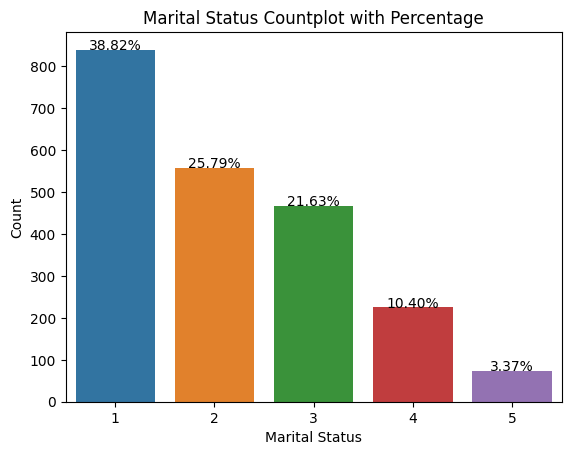

In [ ]:
counts = df['Marital_Status'].value_counts()
percentages = [100*count/len(df['Marital_Status']) for count in counts]
data = pd.DataFrame({'Marital_Status': counts.index, 'count': counts.values, 'percentage': percentages})
sns.barplot(x='Marital_Status', y='count', data=data)

for index, row in data.iterrows():
  plt.text(row.name, row['count'], f'{row["percentage"]:.2f}%', color='black', ha='center')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Countplot with Percentage')
plt.show()

2. Below we can see that 20 customers have complained

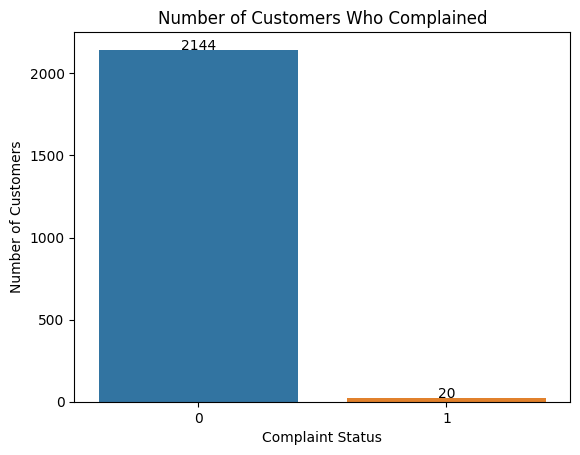

In [ ]:
complaint_counts = df['Complain'].value_counts()
ax = sns.barplot(x=complaint_counts.index, y=complaint_counts.values)
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Who Complained')
for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 2, str(int(i.get_height())), ha='center')

Now for the following questions we ask a lot about the correlation between two features, so we will make some helper functions:

In [ ]:
def scatter_regr_plot_relationship(x_col, y_col):
  sns.jointplot(x=x_col, y=y_col, data=df)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.suptitle(f'Correlation between {x_col} and {y_col}')
  sns.regplot(x=x_col, y=y_col, data=df)
  plt.show()

def bar_plot_relationship(x_col, y_col, agg_func):
  if agg_func == 'sum':
    grouped = df.groupby(x_col)[y_col].sum()
  else:
    grouped = df.groupby(x_col)[y_col].mean()
  x = grouped.index
  y = grouped.values
  fig, ax = plt.subplots()
  ax.bar(x, y)
  ax.set_xlabel(x_col)
  ax.set_ylabel(y_col + ' (' + agg_func + ')')
  plt.show()



3. <p align='justify'> The plot below shows the relationship between the Age Group and the Spent feature. It is evident from the histogram and from the scatter plot that the number of customers decreases as the spent increases, and the edge subgroups (younger and older) have less customers. This is reflected in the sparsity of scatter points in these subgroups and in larger values of Spent, in addittion the the heights of the bars in the histogram plot. The second plot shows that the total value spent in each subgroup increases, reaches its peak in subgroup 4, and then decreases again. On the other hand, in the third plot the mean value spent reveals that subgroup 1 has the highest value, indicating that younger people tend to spend more. The spent value then decreases drastically and gradually increases as we move to older subgroups. </p>


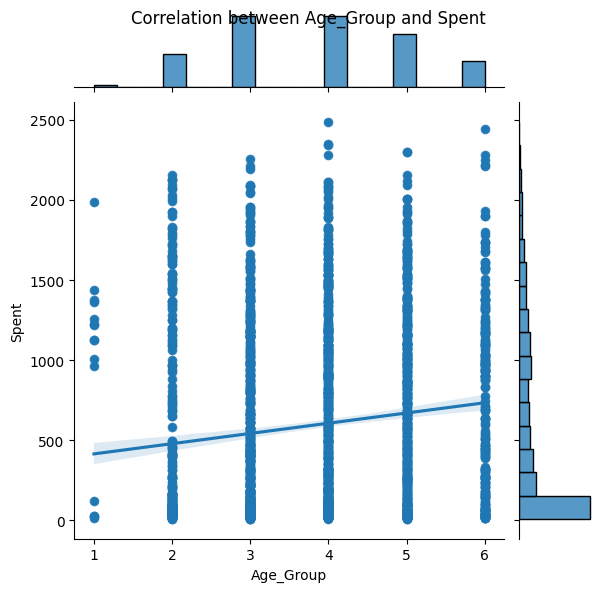

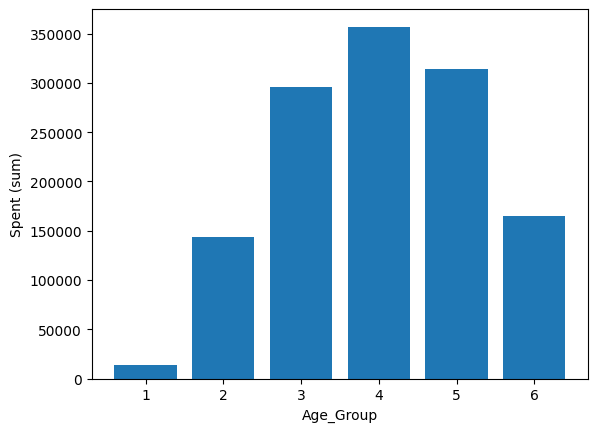

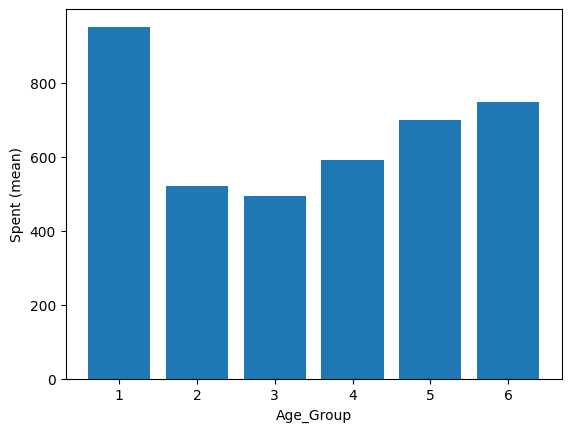

In [ ]:
scatter_regr_plot_relationship('Age_Group', 'Spent')
bar_plot_relationship('Age_Group', 'Spent', 'sum')
bar_plot_relationship('Age_Group', 'Spent', 'mean')


4. <p align='justify'> The plot below shows the relationship between the Education and the Income feature. It is evident from the histogram and from the scatter plot that the number of customers decreases as the Education increases (from Graduation to 2n Cycle), but the lowest number of customers have the basic education subgroup. We also can see from the histograms and from the density of scatter plot that most people are in the middle range of Income. The second plot shows that the most amount of total money is in Graduation group and decreases as the education increases. On the other hand, in the third plot the mean value of income reveals that generally the mean value of income is around the same for each education lelel except the basic.</p>


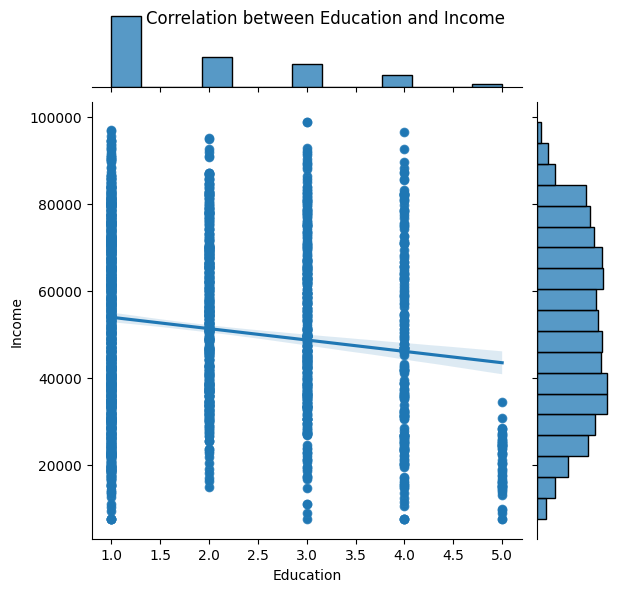

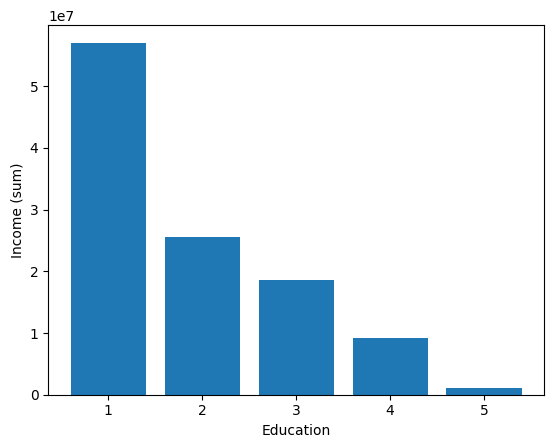

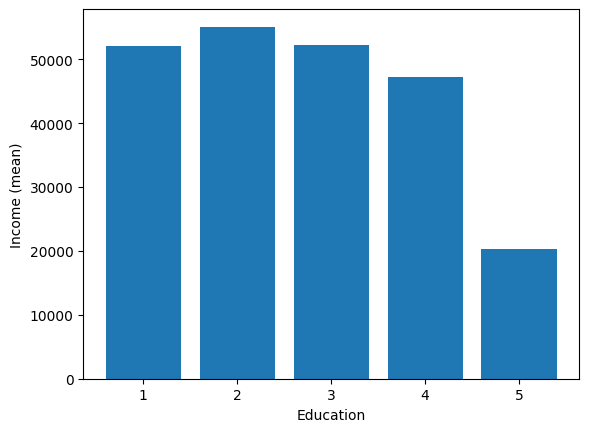

In [ ]:
scatter_regr_plot_relationship('Education', 'Income')
bar_plot_relationship('Education', 'Income', 'sum')
bar_plot_relationship('Education', 'Income', 'mean')


5. <p align='justify'> The plot below shows the relationship between the Family_Size and the Income feature. It is evident from the histogram and from the scatter plot that the number of customers increases as the Family_Size increases till the size of 3 and then decreases. We also can see from the histograms and from the density of scatter plot that most people are in the middle range of Income. The second plot shows that the most amount of total money is in groups of families with size 2 or 3. On the other hand, in the third plot the mean value of income reveals that it decreases as the size of the family increases.</p>




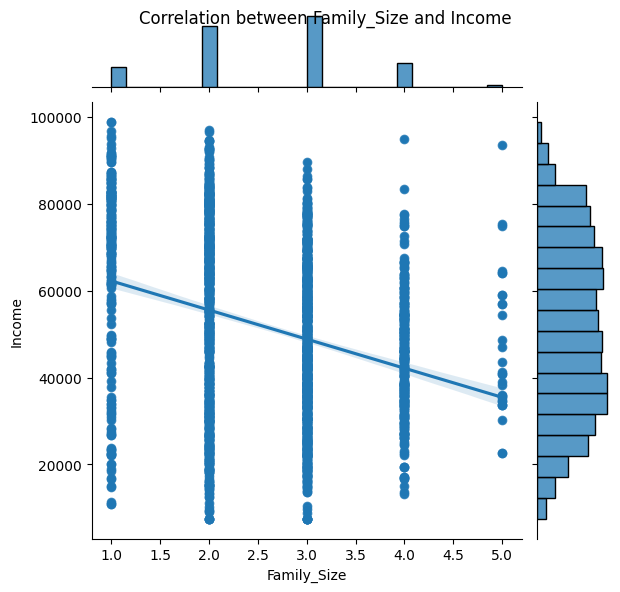

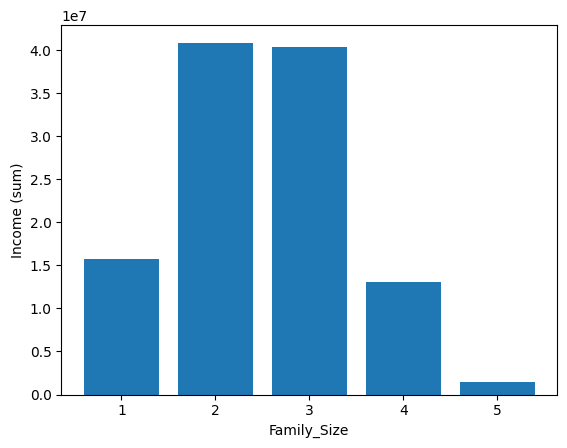

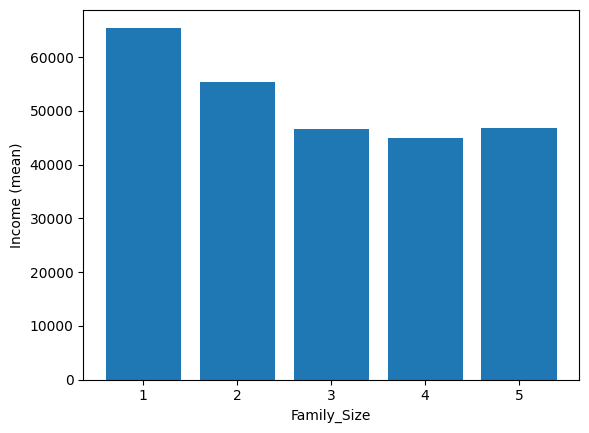

In [ ]:
scatter_regr_plot_relationship('Family_Size', 'Income')
bar_plot_relationship('Family_Size', 'Income', 'sum')
bar_plot_relationship('Family_Size', 'Income', 'mean')

6. <p align='justify'> The plot below shows the relationship between the Children and the Income feature. It is evident from the histogram and from the scatter plot, the same as the previous example, that the number of customers increases as the children increases till the number of 1 and then decreases. We also can see from the histograms and from the density of scatter plot that most people are in the middle range of Income. The second plot shows that the most amount of total money is in groups of families with 0 or 1children. On the other hand, in the third plot the mean value of income reveals that it decreases as the number of children increases.</p>




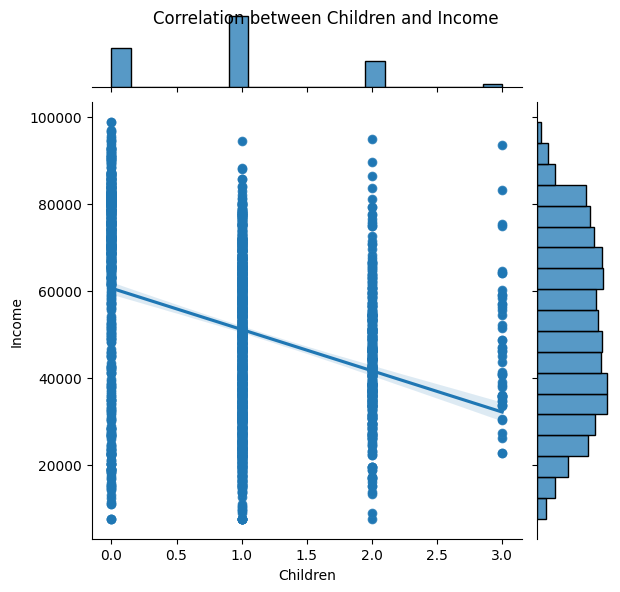

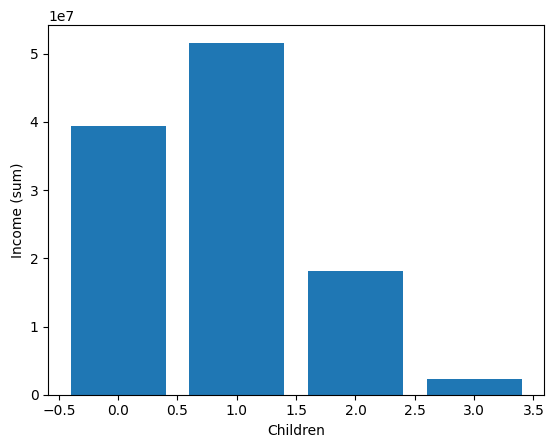

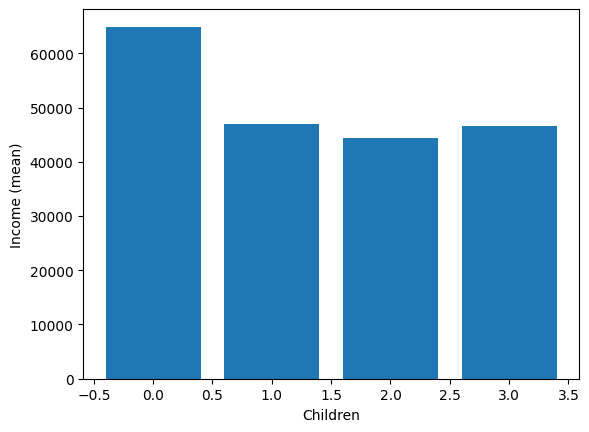

In [ ]:
scatter_regr_plot_relationship('Children', 'Income')
bar_plot_relationship('Children', 'Income', 'sum')
bar_plot_relationship('Children', 'Income', 'mean')

Now for the following questions we will create a helper function that plots a histogram

In [ ]:
def plot_hist(col):
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Histogram of ' + col)
  plt.show()

7. Draw the histogram for the NumDealsPurchases column

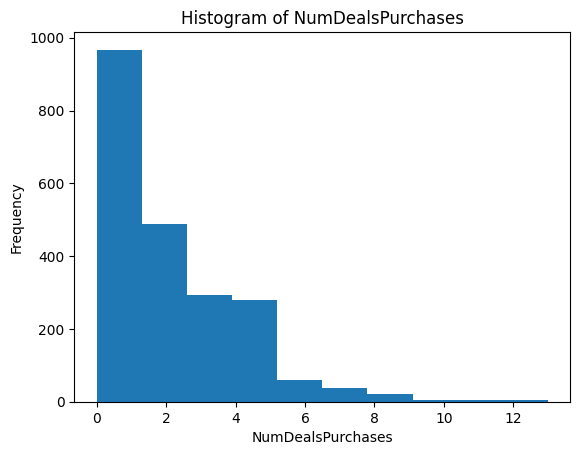

In [ ]:
plot_hist('NumDealsPurchases')

8. Draw the histogram for the Income column.

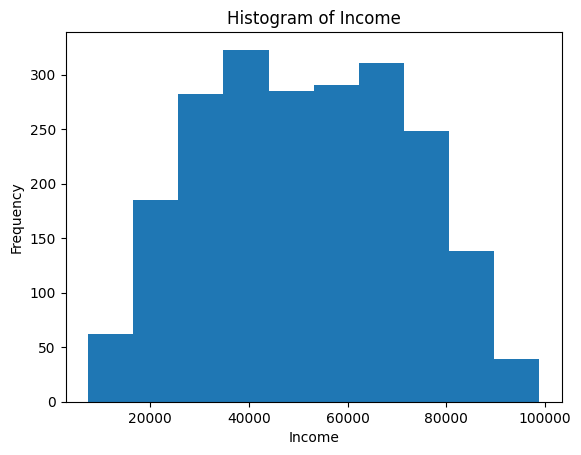

In [ ]:
plot_hist('Income')

9. Draw the histogram for the Kidhome column.


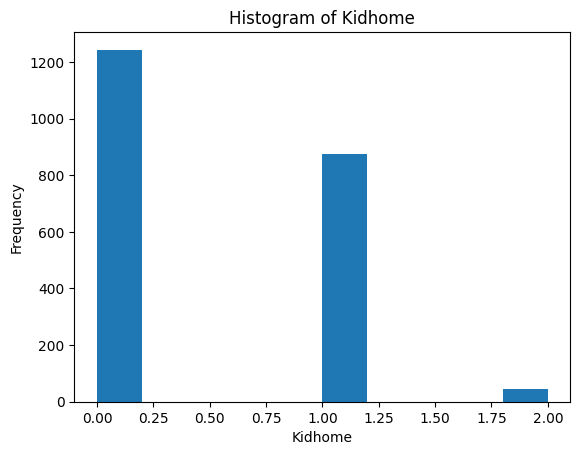

In [ ]:
plot_hist('Kidhome')

10. Draw the histogram for the column Family_Size


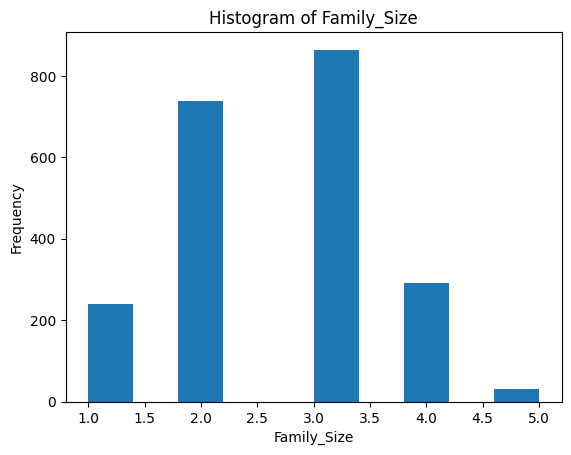

In [ ]:
plot_hist('Family_Size')

# Principal component analysis (PCA)

We remove ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response'] from df and keep only numerical values

In [ ]:
tmp_df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)
tmp_df = tmp_df.select_dtypes(include=['float', 'int'])
tmp_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Age_Group
0,5524,1957,1,3,58138.0,0,0,635,88,546,...,7,3,11,3821.0,66,1617,0,1,0,5
1,2174,1954,1,3,46344.0,1,1,11,1,6,...,5,3,11,3291.0,69,27,2,3,1,5
2,4141,1965,1,2,71613.0,0,0,426,49,127,...,4,3,11,3502.0,58,776,0,2,0,4
3,6182,1984,1,2,26646.0,1,0,11,4,20,...,6,3,11,3329.0,39,53,1,3,1,2
4,5324,1981,2,1,58293.0,1,0,173,43,118,...,5,3,11,3283.0,42,422,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,709,43,182,...,5,3,11,3551.0,56,1341,1,3,1,4
2236,4001,1946,2,2,64014.0,2,1,406,0,30,...,7,3,11,3179.0,77,444,3,5,1,6
2237,7270,1981,1,4,56981.0,0,0,908,48,217,...,6,3,11,3280.0,42,1241,0,1,0,3
2238,8235,1956,3,2,69245.0,0,1,428,30,214,...,3,3,11,3364.0,67,843,1,3,1,5


To perform standardization on the data, we need to subtract the mean of each column and divide by the standard deviation of that column. This will transform each feature to have a mean of 0 and a standard deviation of 1. 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(tmp_df)
df_scaled = pd.DataFrame(df_scaled, columns=tmp_df.columns)
tmp_df = df_scaled
tmp_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Age_Group
0,-0.020196,-1.023629,-0.817293,0.755205,0.328193,-0.830238,-0.937013,1.021900,1.569098,1.793348,...,0.740445,0.0,0.0,1.477583,1.023629,1.727632,-1.277033,-1.771050,-1.603420,0.948376
1,-1.050658,-1.281123,-0.817293,0.755205,-0.254641,1.027709,0.906347,-0.882086,-0.636416,-0.735437,...,-0.137300,0.0,0.0,-1.126580,1.281123,-0.964115,1.396890,0.441101,0.623667,0.948376
2,-0.445608,-0.336979,-0.817293,-0.120137,0.994098,-0.830238,-0.937013,0.384187,0.580420,-0.168802,...,-0.576172,0.0,0.0,-0.089828,0.336979,0.303884,-1.277033,-0.664974,-1.603420,0.117155
3,0.182205,1.293815,-0.817293,-0.120137,-1.228074,1.027709,-0.937013,-0.882086,-0.560364,-0.669876,...,0.301573,0.0,0.0,-0.939867,-1.293815,-0.920099,0.059929,0.441101,0.623667,-1.545289
4,-0.081716,1.036321,0.078212,-0.995480,0.335853,1.027709,-0.937013,-0.387782,0.428315,-0.210949,...,-0.137300,0.0,0.0,-1.165888,-1.036321,-0.295410,0.059929,0.441101,0.623667,-0.714067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,1.624236,-0.165316,-0.817293,-0.995480,0.480647,-0.830238,0.906347,1.247693,0.428315,0.088759,...,-0.137300,0.0,0.0,0.150934,0.165316,1.260386,0.059929,0.441101,0.623667,0.117155
2160,-0.488672,-1.967773,0.078212,-0.120137,0.618572,2.885657,0.906347,0.323161,-0.661767,-0.623047,...,0.740445,0.0,0.0,-1.676894,1.967773,-0.258166,2.733852,2.653252,0.623667,1.779598
2161,0.516874,1.036321,-0.817293,1.630548,0.271016,-0.830238,-0.937013,1.854894,0.555069,0.252662,...,0.301573,0.0,0.0,-1.180629,-1.036321,1.091093,-1.277033,-1.771050,-1.603420,-0.714067
2162,0.813709,-1.109460,0.973717,-0.120137,0.877077,-0.830238,0.906347,0.390289,0.098755,0.238613,...,-1.015044,0.0,0.0,-0.767894,1.109460,0.417310,0.059929,0.441101,0.623667,0.948376


Here we can check if the now mean = 0 and std = 1

In [ ]:
for col in tmp_df.columns:
  col_mean = round(tmp_df[col].mean())
  col_std = round(tmp_df[col].std())
  print(f"{col}: mean={col_mean}, std={col_std}")

ID: mean=0, std=1
Year_Birth: mean=0, std=1
Education: mean=0, std=1
Marital_Status: mean=0, std=1
Income: mean=0, std=1
Kidhome: mean=0, std=1
Teenhome: mean=0, std=1
MntWines: mean=0, std=1
MntFruits: mean=0, std=1
MntMeatProducts: mean=0, std=1
MntFishProducts: mean=0, std=1
MntSweetProducts: mean=0, std=1
MntGoldProds: mean=0, std=1
NumDealsPurchases: mean=0, std=1
NumWebPurchases: mean=0, std=1
NumCatalogPurchases: mean=0, std=1
NumStorePurchases: mean=0, std=1
NumWebVisitsMonth: mean=0, std=1
Z_CostContact: mean=0, std=0
Z_Revenue: mean=0, std=0
Customer_For: mean=0, std=1
Age: mean=0, std=1
Spent: mean=0, std=1
Children: mean=0, std=1
Family_Size: mean=0, std=1
Is_Parent: mean=0, std=1
Age_Group: mean=0, std=1


Now we will perform the PCA. We create a dataframe which contains the three principal components of the original data and then plot a 3D scatter plot of the data.

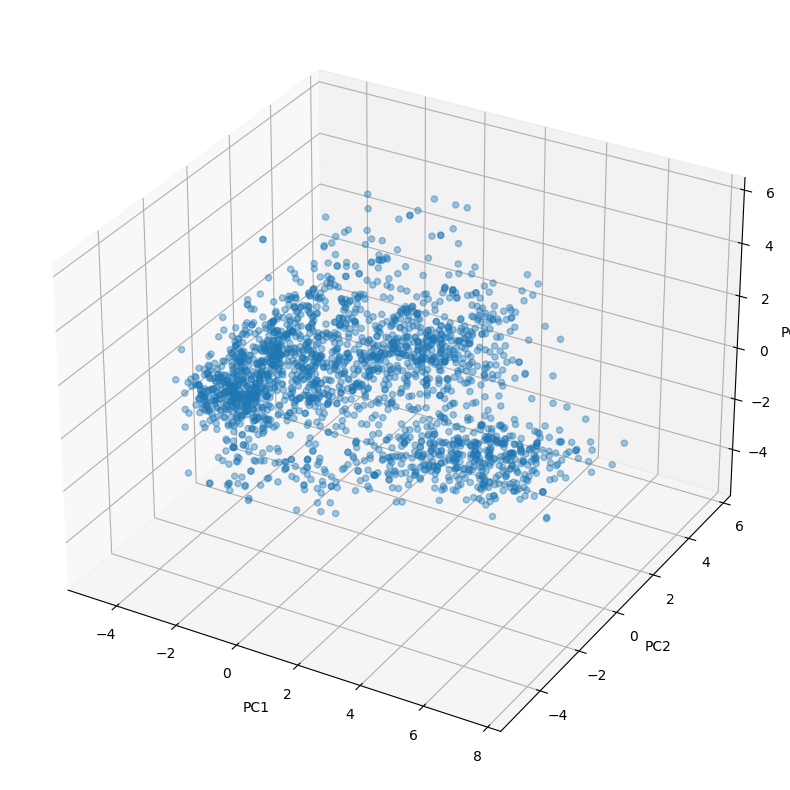

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_result = pca.fit_transform(tmp_df)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], s=20, alpha=0.4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Clustering

<p align = 'justify'>Now we will determine the optimal number of clusters for our dataset. We will use the already standarized dataframe from PCA. We will compute the  within-cluster sum of squares (WSS) for different values of clusters and plot the curve of WSS vs the number of clusters. We will find the point where the rate of decrease in WSS slows.
</p>

In [ ]:
from sklearn.cluster import KMeans

wss = []
distortions = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=800, n_init=20)
    kmeans.fit(pca_result)
    wss.append(kmeans.inertia_)

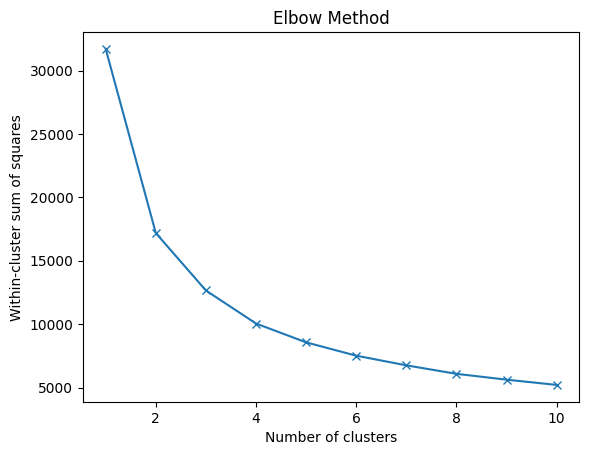

In [ ]:
plt.plot(range(1, 11), wss, marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

We can see that after 4 clusters the rate of decrease in inertia starts to slow down a lot.

Now we will use agglomerative clustering and K-means clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(pca_result)
agg_cluster_labels = agg_clustering.fit_predict(pca_result)

kmeans_clustering = KMeans(n_clusters=4)
kmeans_clustering.fit(pca_result)
kmeans_cluster_labels = kmeans_clustering.predict(pca_result)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We will visualize the clusters using scatter plots

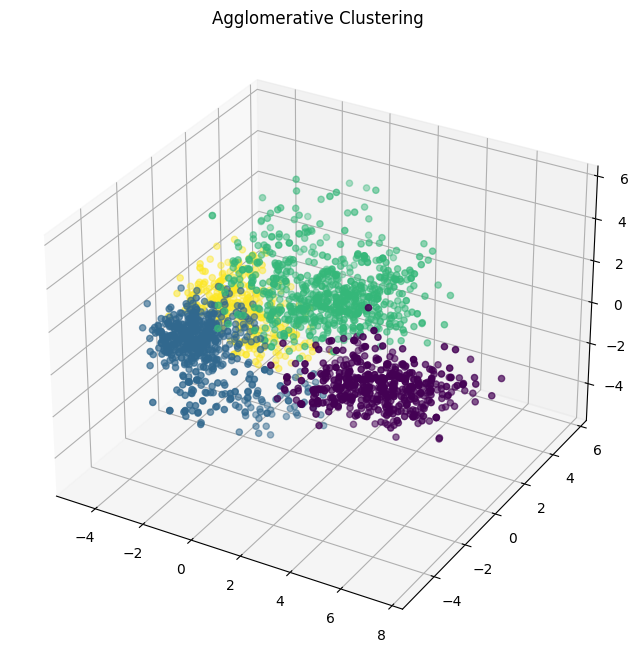

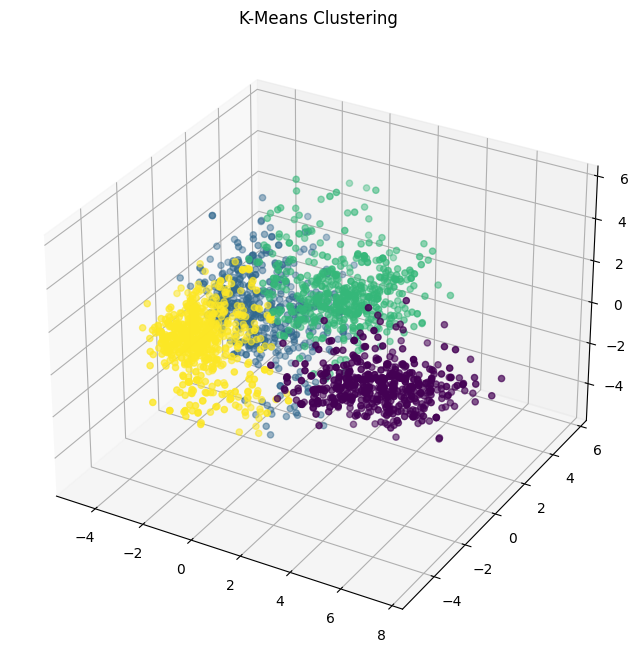

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=agg_cluster_labels)
ax.set_title('Agglomerative Clustering')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_cluster_labels)
ax.set_title('K-Means Clustering')
plt.show()